## Task 1: Data Loading and Preprocessing (5 marks)
1. Load the dataset from the given CSV file into a Pandas Data Frame.
2. Perform basic data preprocessing steps, including handling missing values and removing
duplicate rows.
3. Display the first few rows of the cleaned dataset.

### 1. Data Loading


> Importing Required Libraries

In [ ]:
import pandas as pd



> Loading the Dataset


In [ ]:
path = '/content/Dataset.csv'
df = pd.read_csv(path)



> Display the first few rows of the loaded dataset



In [ ]:
df.head()

,Sno,job,education,gender,English speaker
0,1,manage,15,male,no
1,2,admin,16,male,no
2,3,admin,12,female,no
3,4,admin,8,female,no
4,5,admin,15,male,no


### 2. Data Preprocessing

In [ ]:
# Hide the default index column
df.set_index('Sno', drop=True, inplace=True)

In [ ]:
df.head()

,job,education,gender,English speaker
Sno,,,,
1,manage,15,male,no
2,admin,16,male,no
3,admin,12,female,no
4,admin,8,female,no
5,admin,15,male,no




> Size of the Dataframe



In [ ]:
df.shape

(474, 4)



> Checking if there's any null value in the dataset



In [ ]:
# df.isnull()
df.isnull().sum()
# No Null Value Found

job                0
education          0
gender             0
English speaker    0
dtype: int64



> Unique Values in each Column



In [ ]:
df['job'].unique()

array(['manage', 'admin', 'custodial'], dtype=object)

In [ ]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['education'].unique()

array([15, 16, 12,  8, 19, 17, 18, 14, 20, 21])


> Upon thorough examination, assuming that there are no duplicate entries in the dataset, it's important to note that multiple individuals can have identical record entries. In this dataset, there is no specific 'name' or 'ID' column that can be used to uniquely identify individuals, distinguishing them from others with similar information. As a result, it is not appropriate to consider these repeated entries as duplicates.




> Dropping all Null values (if any) of the Dataframe



In [ ]:
df = df.dropna()

In [ ]:
df.shape  #size of the dataframe is still the same because there are no null values

(474, 4)

### 3. Cleaned Dataset



> Display first few rows of Updated Dataframe



In [ ]:
df.head()

,job,education,gender,English speaker
Sno,,,,
1,manage,15,male,no
2,admin,16,male,no
3,admin,12,female,no
4,admin,8,female,no
5,admin,15,male,no




> Saving the cleaned dataset into CSV file after performing data preprocessing



In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)

## Task 2: Exploratory Data Analysis (6 marks)
1. Create visualizations to show the distribution of job roles, education levels, gender, and
English-speaking status.
2. Calculate the percentage of individuals belonging to different job roles, education levels,
genders, and English-speaking groups.



> Importing required libraries



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



> Loading the cleaned dataset for Task 2


In [ ]:
df = pd.read_csv('cleaned_dataset.csv')

### 1. Data Visualization



> Creating a bar chart to visualize the distribution of job roles



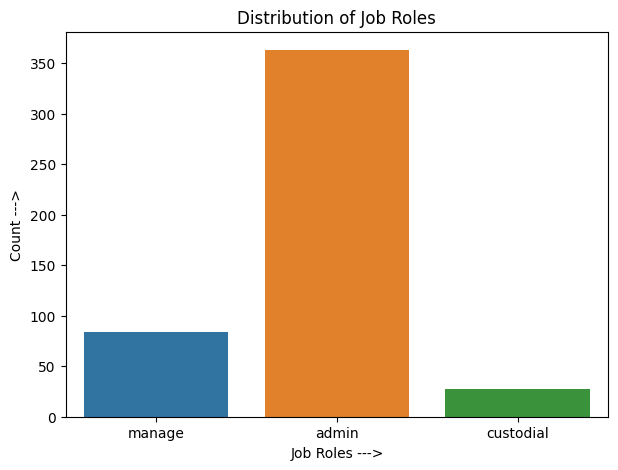

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='job')
# plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.title('Distribution of Job Roles')
plt.xlabel('Job Roles --->')
plt.ylabel('Count --->')
plt.show()



> Creating a bar chart to visualize the distribution of education levels


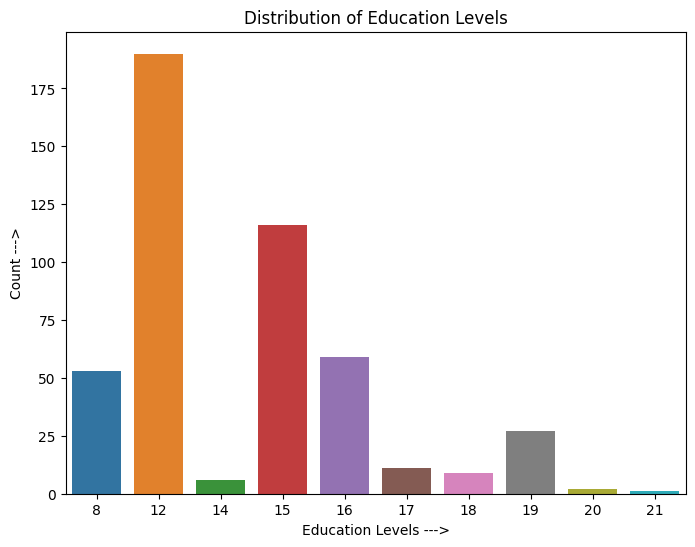

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Education Levels')
plt.xlabel('Education Levels --->')
plt.ylabel('Count --->')
plt.show()



> Creating a pie chart to visualize the distribution of gender



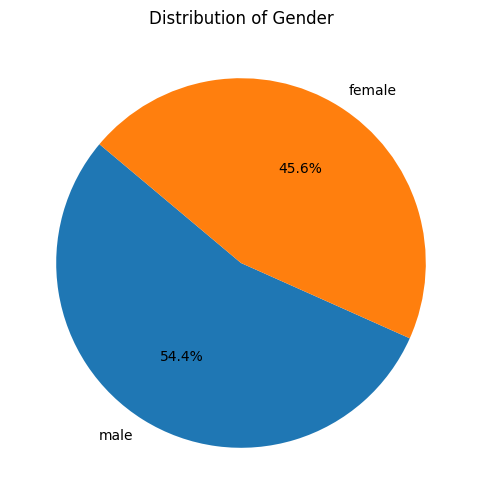

In [ ]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()



> Creating a pie chart to visualize the distribution of English-speaking status



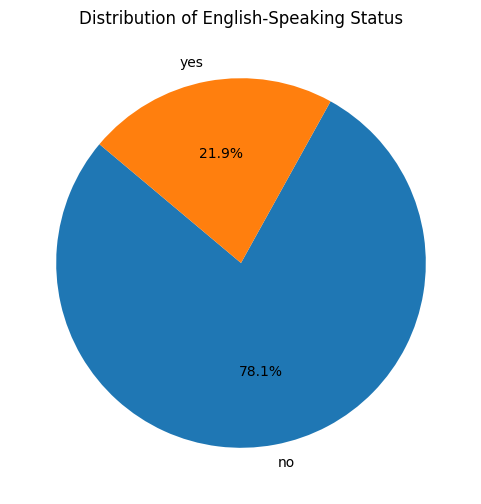

In [ ]:
english_counts = df['English speaker'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(english_counts, labels=english_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of English-Speaking Status')
plt.show()

### 2. Percentage Calculation



> Calculating the percentage of individuals in each category by using the 'value_counts()' function and dividing it by the total number of individuals in the dataset



In [ ]:
# Percentage of individuals belonging to different job roles
job_role_percentage = (df['job'].value_counts() / len(df)) * 100

print("Percentage of individuals by job role:\n", job_role_percentage)

Percentage of individuals by job role:
 admin        76.582278
manage       17.721519
custodial     5.696203
Name: job, dtype: float64


In [ ]:
# Percentage of individuals belonging to different education levels
education_percentage = (df['education'].value_counts() / len(df)) * 100

print("Percentage of individuals by education level:\n", education_percentage)

Percentage of individuals by education level:
 12    40.084388
15    24.472574
16    12.447257
8     11.181435
19     5.696203
17     2.320675
18     1.898734
14     1.265823
20     0.421941
21     0.210970
Name: education, dtype: float64


In [ ]:
# Percentage of individuals belonging to different genders
gender_percentage = (df['gender'].value_counts() / len(df)) * 100

print("Percentage of individuals by gender:\n", gender_percentage)

Percentage of individuals by gender:
 male      54.43038
female    45.56962
Name: gender, dtype: float64


In [ ]:
# Percentage of individuals belonging to different English-speaking status
english_percentage = (df['English speaker'].value_counts() / len(df)) * 100

print("Percentage of individuals by English-speaking status:\n", english_percentage)

Percentage of individuals by English-speaking status:
 no     78.059072
yes    21.940928
Name: English speaker, dtype: float64


## Task 3: Gender and English speaker Analysis (7 marks)
1. Calculate the average education level for each gender group (Male, Female, Others).
2. Compare the distribution of job roles among different gender groups using a stacked bar
chart.
3. Create a histogram to show the distribution of education levels among English speaking
and non-English speaking individuals.

### 1. Average Education Level For Each Gender



> Calculating the average education level for each gender group



In [ ]:
gender_education_avg = df.groupby('gender')['education'].mean()
print(gender_education_avg)

gender
female    12.370370
male      14.430233
Name: education, dtype: float64


### 2. Comparing distribution of Job roles for different Gender groups



> Creating a DataFrame with the count of job roles for each gender group



In [ ]:
gender_job_counts = df.groupby(['gender', 'job']).size().unstack(fill_value=0)

In [ ]:
gender_job_counts.head()

job,admin,custodial,manage
gender,,,
female,206,0,10
male,157,27,74




> Creating a stacked bar chart



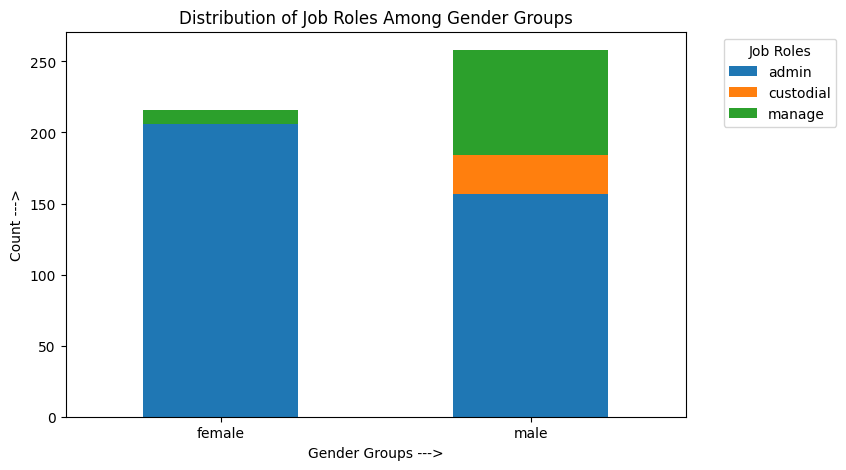

In [ ]:
gender_job_counts.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribution of Job Roles Among Gender Groups')
plt.xlabel('Gender Groups --->')
plt.ylabel('Count --->')
plt.xticks(rotation=0)
plt.legend(title='Job Roles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3. Camparing the distribution of education levels among English-speaking and Non-English-speaking individuals



> Separating the data into English-speaking and non-English-speaking individuals



In [ ]:
english_speakers = df[df['English speaker'] == 'yes']
non_english_speakers = df[df['English speaker'] == 'no']



> Creating Histogram for Education Levels



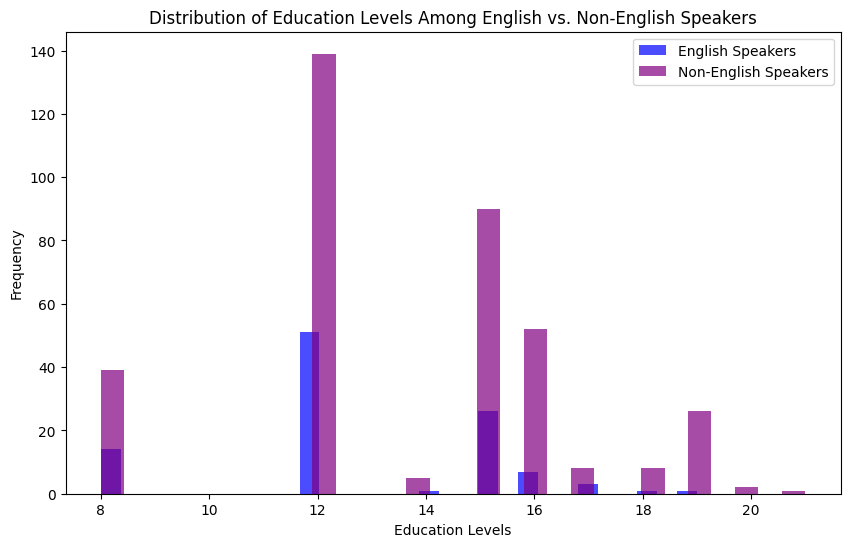

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(english_speakers['education'], bins=30, alpha=0.7, label='English Speakers', color='blue')
plt.hist(non_english_speakers['education'], bins=30, alpha=0.7, label='Non-English Speakers', color='purple')
plt.title('Distribution of Education Levels Among English vs. Non-English Speakers')
plt.xlabel('Education Levels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 4: Predictive Modeling (12 Marks)
1. Encode categorical variables (job, education, gender, English speaker) using appropriate
techniques (e.g., one-hot encoding).
2. Split the dataset into training and testing sets (80% training, 20% testing).
3. Build a classification model to predict the gender of individuals based on job role,
education level, and English-speaking status.
4. Evaluate the model's performance using accuracy, precision, recall, and F1-score
metrics.
5. Use feature importance techniques (e.g., feature importance scores, permutation
feature importance) to identify the most influential features for gender prediction.
6. Visualize the ROC curve and AUC score for the gender prediction model.
7. Discuss the implications of the model's performance and the significance of the features
in a concise summary.

### 1. Encoding Categorical Variables



> Using one-hot encoding to encode categorical variables



In [ ]:
df = pd.read_csv('/content/cleaned_dataset.csv')

In [ ]:
df_encoded = pd.get_dummies(df, columns=['job', 'education', 'English speaker'], drop_first=True)

### 2. Splitting the Dataset into Training and Testing Sets (80% training, 20% testing)

In [ ]:
from sklearn.model_selection import train_test_split



> Defining features x and target y



In [ ]:
X = df_encoded.drop('gender', axis=1)  # Features (all columns except 'gender')
y = df_encoded['gender']  # Target variable (gender)



> Splitting the dataset into training (80%) and testing (20%) sets



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Building the Classification Model



> Here, I've used 'RANDOM FOREST' as a classification algorithm to build the gender prediction model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4. Evaluating The Random Forest Model's Performance



> Calculating various evaluation metrics such as accuracy, precision, recall, and F1-score.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicting gender on the test data
y_pred = rf_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculating recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculating F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7368421052631579
Precision: 0.7409356725146199
Recall: 0.7368421052631579
F1 Score: 0.7368421052631577


### 5. Feature Importance Techniques



> Since Random Forest models provide feature importance scores, which indicates the influence of each feature in making predictions. So here I've used the feature_importances_ attribute of the trained model to access these scores.



In [ ]:
# Accessing feature importances
feature_importance = rf_model.feature_importances_

# Mapping the feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Sorting features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the top N important features
top_n = 10  # Change to the desired number of top features
print(f"Top {top_n} Important Features:")
for feature, importance in sorted_feature_importance[:top_n]:
    print(f"{feature}: {importance}")

Top 10 Important Features:
education_12: 0.22428525970634638
job_manage: 0.1915404184469097
job_custodial: 0.1808882007950948
education_15: 0.13765560628946946
English speaker_yes: 0.0740457100149931
education_19: 0.06899104325397365
education_16: 0.03825958563971595
education_14: 0.03585626853224344
education_18: 0.02719792642013332
education_17: 0.01706062779510556


### 6. Visualizing the ROC curve and AUC score

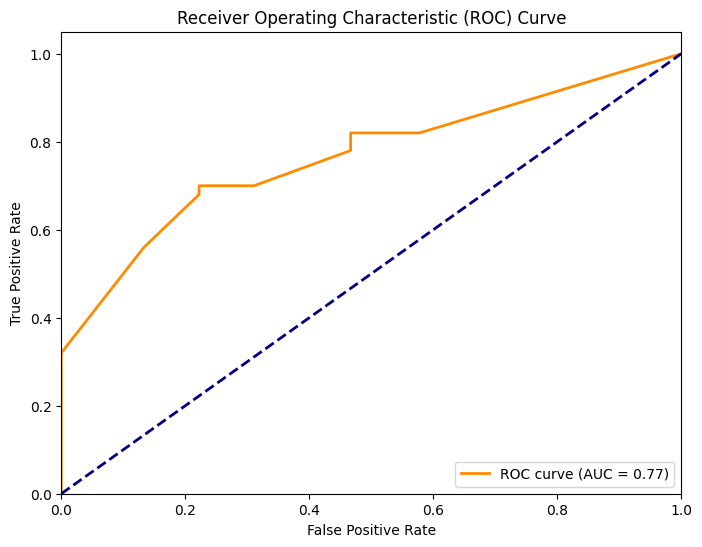

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Encode gender labels into binary (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict gender probabilities on the test data
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test_encoded, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



> Here I've calculated the ROC AUC Score for the model below.

> The ROC AUC score measures the model's ability to distinguish between the positive and negative classes. It provides a single value representing the model's overall performance, with higher values indicating better discrimination between classes.



In [ ]:
from sklearn.metrics import roc_auc_score

# Predict gender probabilities on the test data
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Print the ROC AUC score
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.7664444444444444


### 7. Implications of the model's performance and significance of the features are summarized below



> The Random Forest model demonstrates a reasonable level of performance for gender prediction, achieving the ROC AUC Score of 76.64%. It reliably distinguishes between male and female individuals with the Accuracy of 73.68, Precision of 74.09, Recall of 73.68 and F1 Score of 73.68. However, it is observed that certain features, such as 'education level' and 'job role,' have a more significant influence on predictions than others as these features often correlate with gender. While the model performs well overall, being cautious about potential biases in the dataset and continue monitoring for fairness and ethical considerations, is a must.

> Also it's worth noting that the model's performance to new, unseen data should be further evaluated to ensure its reliability in real-world scenarios. Additionally, I believe future work could explore the incorporation of additional features or data sources to enhance prediction accuracy and address any remaining limitations.



### Assessment-1 Completed
### Khushi Sharma / 8800160170 / Reliance Jio